In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
import scanpy as sc
import scvi

# Load the data
adata = sc.read_h5ad("seurat_data.h5ad")
print(adata)
adata.obs.head()

c:\Users\steel\miniconda3\envs\scbb\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AnnData object with n_obs × n_vars = 8283 × 26513
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.8', 'seurat_clusters', 'marker_cell_type', 'scina_cell_type', 'predicted.id', 'group', 'RNA_snn_res.4', 'cluster_group', 'healhy_cells_percent', 'combine_group_pathlogy', 'associate_cells', 'prediction.score.Excitatory.neurons', 'prediction.score.Oligodendrocytes', 'prediction.score.Oligodendrocyte.precursor.cells', 'prediction.score.Astrocytes', 'prediction.score.Endothelial.cells', 'prediction.score.Inhibitory.neurons', 'prediction.score.Microglia', 'prediction.score.max'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'HARMONY', 'PCs'


,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.8,seurat_clusters,marker_cell_type,scina_cell_type,predicted.id,group,RNA_snn_res.4,...,combine_group_pathlogy,associate_cells,prediction.score.Excitatory.neurons,prediction.score.Oligodendrocytes,prediction.score.Oligodendrocyte.precursor.cells,prediction.score.Astrocytes,prediction.score.Endothelial.cells,prediction.score.Inhibitory.neurons,prediction.score.Microglia,prediction.score.max
AAACCTGAGGCGATAC.4,all,2747.035464,1460,NA,9,NA,NA,Astrocytes,disease,9,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
AAACCTGTCGAGAGCA.4,all,1543.701741,539,NA,0,NA,NA,Oligodendrocytes,disease,0,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
AAACCTGTCTATGTGG.4,all,3210.610872,2017,NA,16,NA,NA,Inhibitory neurons,disease,16,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
AAACGGGCAAATCCGT.4,all,1998.974916,849,NA,29,NA,NA,Oligodendrocytes,disease,29,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
AAACGGGGTCTTCGTC.4,all,3755.120060,3084,NA,49,NA,NA,Excitatory neurons,disease,49,...,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


c:\Users\steel\miniconda3\envs\scbb\Lib\site-packages\scanpy\preprocessing\_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


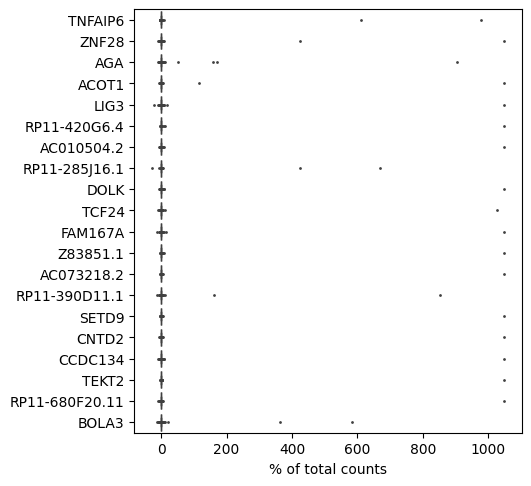

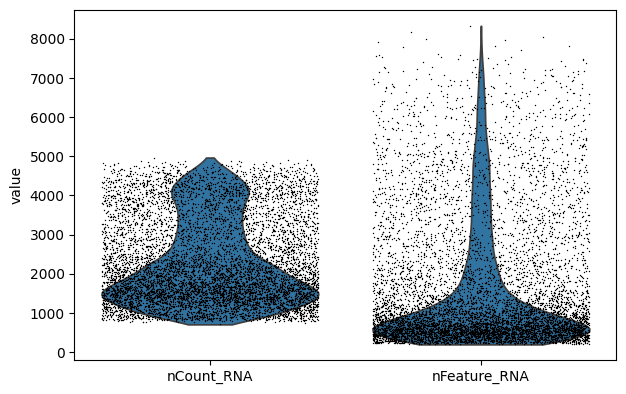

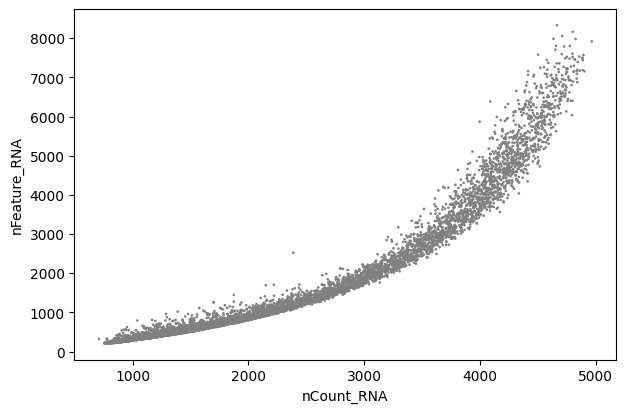

In [8]:
sc.pl.highest_expr_genes(adata, n_top=20)
sc.pl.violin(adata, ['nCount_RNA', 'nFeature_RNA'], jitter=0.4)
sc.pl.scatter(adata, x='nCount_RNA', y='nFeature_RNA')

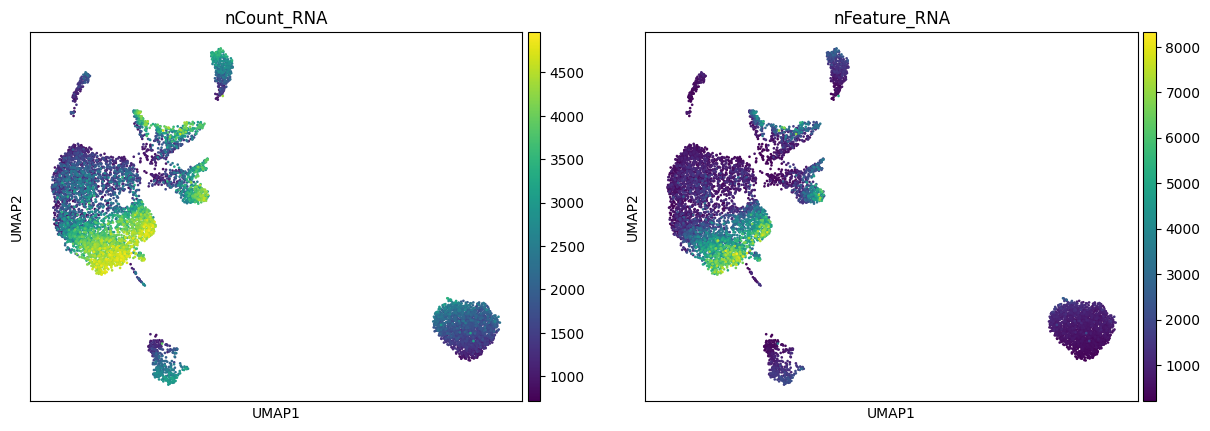

In [9]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['nCount_RNA', 'nFeature_RNA'])

C:\Users\steel\AppData\Local\Temp\ipykernel_32476\3615285086.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


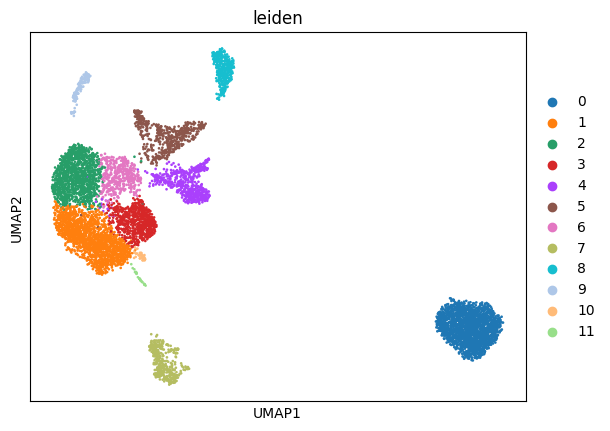

In [ ]:
sc.tl.leiden(adata, resolution=0.5)
sc.pl.umap(adata, color='leiden')

In [ ]:
from scvi.external import MRVI

adata.X = adata.raw.X
MRVI.setup_anndata(adata)
model = MRVI(adata)
model.train(max_epochs=100)

In [4]:
import jax
print("JAX devices:", jax.devices())

JAX devices: [CpuDevice(id=0)]


C:\Users\steel\AppData\Local\Temp\ipykernel_18120\39243920.py:5: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


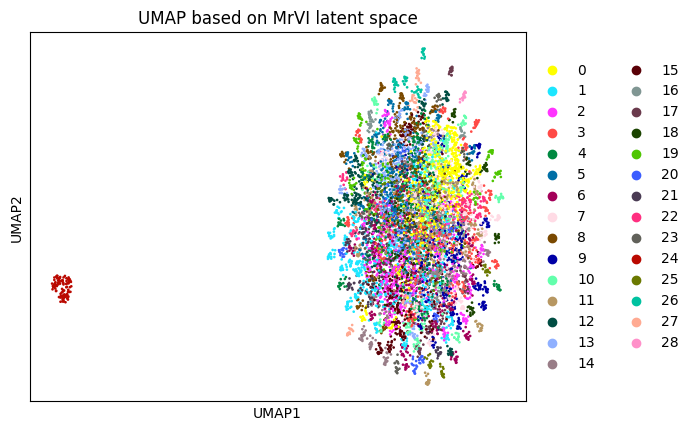

In [ ]:
sc.pp.neighbors(adata, use_rep="X_MrVI")
# Run the Leiden clustering algorithm to generate cluster labels
sc.tl.leiden(adata, resolution=0.5)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["leiden"], title="UMAP based on MrVI latent space")